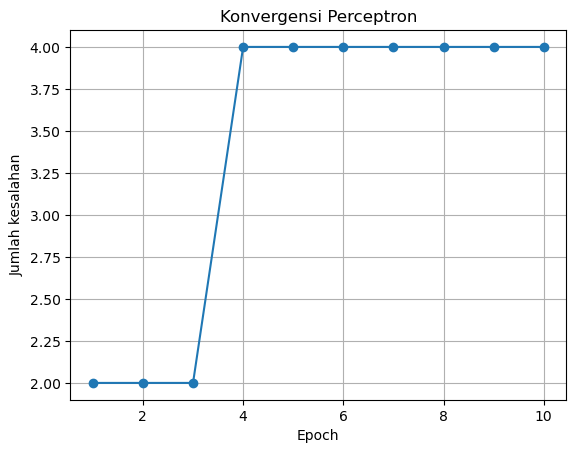

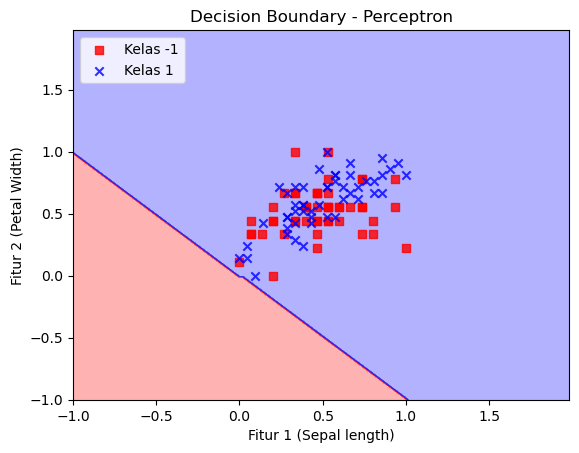

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

csv_file = "Percobaan3_622023002.csv"
npz_file = "Percobaan3_622023002.npz"

data = pd.read_csv(csv_file)
labels = np.load(npz_file)

X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values   

binary_mask = (y == 0.0) | (y == 1.0)
X = X[binary_mask]
y = y[binary_mask]

X = X[:, [0, 2]] 

y = np.where(y == 0.0, -1, 1)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.errors = []

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])  # termasuk bias
        for _ in range(self.n_iter):
            error_count = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error_count += int(update != 0.0)
            self.errors.append(error_count)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(learning_rate=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Jumlah kesalahan')
plt.title('Konvergensi Perceptron')
plt.grid(True)
plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],
                    label=f'Kelas {cl}')
    plt.xlabel('Fitur 1 (Sepal length)')
    plt.ylabel('Fitur 2 (Petal Width)')
    plt.legend(loc='upper left')
    plt.title('Decision Boundary - Perceptron')
    plt.show()

plot_decision_regions(X, y, classifier=ppn)
